<img src='https://www.reliance-project.eu/wp-content/uploads/2021/03/Asset-8mdpi.svg' alt='Layout' align='left' width='25%'></img> 
<img src='https://media-exp1.licdn.com/dms/image/C560BAQFFDze0s3l-pQ/company-logo_200_200/0?e=2159024400&v=beta&t=jG_sh9NpwE6yc2TspIcL2YUR2X7OBzTrRSu6w7sNYtc' alt='Layout' align='right' width='10%'></img>
<br>
<br>
<br>
<br>
<br>

# Impact of the Covid-19 Lockdown on Air quality over Europe

:::{eval-rst}
:opticon:`tag`
:badge:`copernicus,badge-primary`
:badge:`air-quality,badge-secondary`
:::

[![RoHub - FAIR Executable Research Object](https://img.shields.io/badge/RoHub-FAIR_Executable_Research_Object-2ea44f?logo=Open+Access&logoColor=blue)](https://w3id.org/ro-id/53aa90bf-c593-4e6d-923f-d4711ac4b0e1)

<a href="https://orcid.org/0000-0002-1784-2920">Anne Fouilloux</a>, <a href="https://orcid.org/0000-0002-8763-1643">Jean Iaquinta</a> 

<b>This Jupyter notebook is distributed under <a href="https://choosealicense.com/licenses/mit/">MIT License</a></b>

<div class="alert alert-success alert-info">
<b>This Jupyter notebook shows how to discover RELIANCE datacube resources (spatial and temporal search and subsetting) and ROHUB to create Research Object</b>
</div>

This notebook shows how to discover and access the [Copernicus Atmosphere Monitoring](https://ads.atmosphere.copernicus.eu/#!/home) products available in the **RELIANCE** datacube resources, by using the functionalities provided in the <font color='blue'> **Adam API** </font>. The process is structured in 6 steps, including example of data analysis and visualization with the Python libraries installed in the Jupyter environment.

- [1. Background](#1.Background)
- [2. Python Packages](#2.Python_Packages)
- [3. Data Management Plan](#3.Data_Management_Plan)
- [4. ADAM API Authentication](#4.Adam_uthentication)
- [5. Datasets Discovery](#5.Datasets_Discovery)
- [6. Products Discovery](#6.Products_Discovery)
- [7. Data Access](#7.Data_Access)
- [8. Data Analysis and Visualization](#8.Data_Analysis_Visualization)
- [9. Discussion](#9.Discussion)
- [10. Conclusion](#10.Conclusion)
- [11. Share our work as a Research Object](#11.Research_Object)

## <a id=1.Background></a> Background

The COVID-19 pandemic has led to significant reductions in economic activity, especially during lockdowns. Several studies has shown that the concentration of nitrogen dioxyde and particulate matter levels have reduced during lockdown events. Reductions in transportation sector emissions are most likely largely responsible for the NO2 anomalies. In this study, we analyze the impact of lockdown events on the air quality using data from [Copernicus Atmosphere Monitoring Service](https://ads.atmosphere.copernicus.eu/).

## <a id=3.Python_Packages></a> Python packages
Additional packages need to be installed to run this Jupyter notebook on default EGI notebook environment

In [1]:
pip install adamapi rohub geojson_rewind cmaps cmcrameri seaborn

Note: you may need to restart the kernel to use updated packages.


## <a id=2.Data_Management_Plan></a> Data Management Plan

### Authors

- Make sure you first register to RoHub at https://reliance.rohub.org/.
- We recommend you use your ORCID identifier to login and register to EOSC services.
- In the list of authors, add any co-authors using the email address they used when they registered in RoHub.

In [2]:
author_emails = ['annefou@geo.uio.no']

### Add the University of Olso as publishers

In [3]:
UiO_organization = {"org_id":"http://www.uio.no/english/", 
                     "display_name": "University of Oslo", 
                     "agent_type": "organization",
                     "ror_identifier":"01xtthb56",
                     "organization_url": "http://www.uio.no/english/"}

In [4]:
list_publishers = [UiO_organization]

In [5]:
list_copyright_holders = [UiO_organization]

### Add the funding
- if your work is not funded set
```
funded_by = {}
```

In [6]:
funded_by = {
"grant_id": "101017502",
"grant_Name": "RELIANCE",
"grant_title": "Research Lifecycle Management for Earth Science Communities and Copernicus Users",
"funder_name": "European Commission",
"funder_doi": "10.13039/501100000781",
}

### Choose a license for your FAIR digital Object
- We choose MIT license because we are creating an executable Research Object. 
- To see all the available licenses:

```
import rohub
licenses = rohub.list_available_licenses()
print(licenses)
```

- You can also add your own custom license (see [RoHub documentation](https://reliance-eosc.github.io/ROHUB-API_documentation/html/index.html)).

In [7]:
license = 'MIT'

### Organize my data

- Define a prefix for my project (you may need to adjust it for your own usage on your infrastructure).
    - input folder where all the data used as input to my Jupyter Notebook is stored (and eventually shared)
    - output folder where all the results to keep are stored
    - tool folder where all the tools, including this Jupyter Notebook will be copied for sharing
- Create all corresponding folders

In [8]:
import os
import warnings
import pathlib

In [9]:
warnings.filterwarnings('ignore')

In [10]:
WORKDIR_FOLDER = os.path.join(os.environ['HOME'], "datahub/Reliance/Climate")
print("WORKDIR FOLDER: ", WORKDIR_FOLDER)

WORKDIR FOLDER:  /home/jovyan/datahub/Reliance/Climate


In [11]:
INPUT_DATA_DIR = os.path.join(WORKDIR_FOLDER, 'input')
OUTPUT_DATA_DIR = os.path.join(WORKDIR_FOLDER, 'output')
TOOL_DATA_DIR = os.path.join(WORKDIR_FOLDER, 'tool')

list_folders = [INPUT_DATA_DIR, OUTPUT_DATA_DIR, TOOL_DATA_DIR]

for folder in list_folders:
    pathlib.Path(folder).mkdir(parents=True, exist_ok=True)

## <a id=4.Adam_uthentication></a> ADAM API Authentication

<div class="alert alert-warning alert-info">
    The following lines of code will show the personal <b>Adam API-Key</b> of the user and the endpoint currently in use, that provides access to the products in the related catalogue. At the end of the execution, if the authentication process is successfull the personal token and the expiration time should be returned as outputs.
    
</div>

### Get ADAM Key from a local file

- get an account to https://reliance.adamplatform.eu/ (use ORCID to authenticate)
- get your your ADAM API key (click on your profile after you login and copy "Api Key")
- make sure you save your ADAM API key in a file $HOME/adam-key

In [12]:
adam_key = open(os.path.join(os.environ['HOME'],"adam-key")).read().rstrip()

In [13]:
import adamapi as adam
a = adam.Auth()
a.setKey(adam_key)
a.setAdamCore('https://reliance.adamplatform.eu')
a.authorize() 

{'expires_at': '2022-05-30T12:59:27.013Z',
 'access_token': '0292b3ddca1b4cf0870f27092ef2da98',
 'refresh_token': '61ab3bb775484c07a7168c8f8e83b5d3',
 'expires_in': 3600}

## <a id=5.Datasets_Discovery></a> Datasets Discovery

After the authorization, the user can browse the whole catalogue, structured as a JSON object after a pagination process,  displaying all the available datasets. This operation can be executed with the <font color='blue'> **getDatasets()** </font> function without including any argument. Some lines of code should be added to parse the Json object and extract the names of the datasets.The Json object can be handled as a Python dictionary.

### Pre-filter datasets

We will discover all the available datasets in the ADAM platform but will only print elements of interest **EU_CAMS** e.g. [European air quality datasets](https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-europe-air-quality-forecasts?tab=overview) from Copernicus Atmosphere Monitoring Service

In [14]:
filter_datasets = 'CAMS'

In [15]:
from adamapi import Datasets

datasets = Datasets(a)
catalogue = datasets.getDatasets()

# Extracting the size of the catalogue

total = catalogue['properties']['totalResults']
items = catalogue['properties']['itemsPerPage']
pages = total//items

print('----------------------------------------------------------------------')
print('\033[1m' + 'List of available datasets:')
print ('\033[0m')

# Extracting the list of datasets across the whole catalogue

for i in range(0,pages):
    page = datasets.getDatasets(page = i)
    for element in page['content']: 
        if filter_datasets in element['title'] :
            print(element['title'] + "\033[1m" + " --> datasetId "+ "\033[0m" + "= " + element['datasetId'])

----------------------------------------------------------------------
List of available datasets:

CAMS European air quality forecasts: C2H3NO5 --> datasetId = 69619:EU_CAMS_SURFACE_C2H3NO5_G
CAMS European air quality forecasts: CO --> datasetId = 69620:EU_CAMS_SURFACE_CO_G
EU_CAMS_SURFACE_NH3_G --> datasetId = 69621:EU_CAMS_SURFACE_NH3_G
CAMS European air quality forecasts: NMVOC --> datasetId = 69622:EU_CAMS_SURFACE_NMVOC_G
CAMS European air quality forecasts: NO2 --> datasetId = 69623:EU_CAMS_SURFACE_NO2_G
EU_CAMS_SURFACE_NO_G --> datasetId = 69624:EU_CAMS_SURFACE_NO_G
CAMS European air quality forecasts: O3 --> datasetId = 69625:EU_CAMS_SURFACE_O3_G
CAMS European air quality forecasts: PM10 --> datasetId = 69626:EU_CAMS_SURFACE_PM10_G
CAMS European air quality forecasts: PM25 --> datasetId = 69627:EU_CAMS_SURFACE_PM25_G
CAMS European air quality forecasts: REC --> datasetId = 69628:EU_CAMS_SURFACE_REC_G
CAMS European air quality forecasts: SIA --> datasetId = 69629:EU_CAMS_SURFACE

We are interested by 3 different products:
- Nitrogen Dioxyde (NO2=
- Particulate matter < 2.5 µm (PM2.5)
- Ozone concentration (O3)

So we will discover **EU_CAMS_SURFACE_NO2_G**, **EU_CAMS_SURFACE_PM25_G** and **EU_CAMS_SURFACE_O3_G** and print the metadata of each dataset, showing the data provenance.

In [16]:
def get_metadata(datasetID, datasets, verbose=False):
    print('\033[1;34m' + 'Metadata of ' + datasetID + ':')
    print ('\033[0;0m')
    
    paged = datasets.getDatasets(datasetID)
    for i in paged.items():
        print("\033[1m" +  str(i[0]) + "\033[0m" + ': ' + str(i[1]))
    return paged

### CAM Surface NO2

In [17]:
datasetID_NO2 = '69623:EU_CAMS_SURFACE_NO2_G'
metadata_NO2 = get_metadata(datasetID_NO2, datasets, verbose=True)

Metadata of 69623:EU_CAMS_SURFACE_NO2_G:

datasetId: 69623:EU_CAMS_SURFACE_NO2_G
creationDate: 2021-07-12T00:00:00Z
dataType: Float32
epsg: 4326
keywords: []
license: {'documentationUrl': '', 'dataProviderName': 'ADS', 'dataProviderUrl': '', 'licenseId': '', 'dataPolicy': '', 'doi': '', 'credits': ''}
maxValue: [1.354510459350422e-07]
minValue: [0.0]
numberOfRecords: 135590
profile: {'profileSchema': 'eo_profile_schema.json', 'name': 'Earth Observation', 'mission': 'CAMS', 'sensor': 'CAMS', 'processingLevel': 'forecast', 'instrument': '', 'platform': ''}
resolutionUnit: degree
temporalResolution: Hourly
unit: 
unitDescription: 
updateDate: 2022-05-29T12:03:27Z
geometry: {'type': 'Polygon', 'coordinates': [[[-25.000012, 29.999997], [44.999988, 29.999997], [44.999988, 71.999997], [-25.000012, 71.999997], [-25.000012, 29.999997]]]}
resolutions: [0.1]
anyText: 4326,ESA,Daily,ESA
applications: ['Atmosphere']
datasetManager: govoni@meeo.it
datasetManagerOrganisation: meeo
description: CAMS N

### Particule matter < 2.5 µm (PM2.5)

In [18]:
datasetID_PM2_5 = '69627:EU_CAMS_SURFACE_PM25_G'
metadata_PM2_5 = get_metadata(datasetID_PM2_5, datasets, verbose=True)

Metadata of 69627:EU_CAMS_SURFACE_PM25_G:

datasetId: 69627:EU_CAMS_SURFACE_PM25_G
creationDate: 2021-07-12T03:00:00Z
dataType: Float32
epsg: 4326
keywords: []
license: {'documentationUrl': '', 'dataProviderName': 'ADS', 'dataProviderUrl': '', 'licenseId': '', 'dataPolicy': '', 'doi': '', 'credits': ''}
maxValue: [709.8012084960938]
minValue: [0.0]
numberOfRecords: 33830
profile: {'profileSchema': 'eo_profile_schema.json', 'name': 'Earth Observation', 'mission': 'CAMS', 'sensor': 'CAMS', 'processingLevel': 'forecast', 'instrument': '', 'platform': ''}
resolutionUnit: degree
temporalResolution: Daily
unit: 
unitDescription: 
updateDate: 2022-05-29T12:00:52Z
geometry: {'type': 'Polygon', 'coordinates': [[[-25.000012, 29.999997], [44.999988, 29.999997], [44.999988, 71.999997], [-25.000012, 71.999997], [-25.000012, 29.999997]]]}
resolutions: [0.1]
anyText: 4326,ESA,Daily,ESA
applications: ['Atmosphere']
datasetManager: govoni@meeo.it
datasetManagerOrganisation: meeo
description: CAMS SURFA

### Surface Ozone (O3)

In [19]:
datasetID_O3 = '69625:EU_CAMS_SURFACE_O3_G'
metadata_O3 = get_metadata(datasetID_O3, datasets, verbose=True)

Metadata of 69625:EU_CAMS_SURFACE_O3_G:

datasetId: 69625:EU_CAMS_SURFACE_O3_G
creationDate: 2021-07-12T02:00:00Z
dataType: Float32
epsg: 4326
keywords: []
license: {'documentationUrl': '', 'dataProviderName': 'ADS', 'dataProviderUrl': '', 'licenseId': '', 'dataPolicy': '', 'doi': '', 'credits': ''}
maxValue: [2.2007016298175586e-07]
minValue: [0.0]
numberOfRecords: 34329
profile: {'profileSchema': 'eo_profile_schema.json', 'name': 'Earth Observation', 'mission': 'CAMS', 'sensor': 'CAMS', 'processingLevel': 'forecast', 'instrument': '', 'platform': ''}
resolutionUnit: degree
temporalResolution: Hourly
unit: 
unitDescription: 
updateDate: 2022-05-29T12:05:10Z
geometry: {'type': 'Polygon', 'coordinates': [[[-25.000012, 29.999997], [44.999988, 29.999997], [44.999988, 71.999997], [-25.000012, 71.999997], [-25.000012, 29.999997]]]}
resolutions: [0.1]
anyText: 4326,ESA,Daily,ESA
applications: ['Atmosphere']
datasetManager: govoni@meeo.it
datasetManagerOrganisation: meeo
description: CAMS OZO

## <a id=6.Products_Discovery></a> Products Discovery

The products discovery operation related to a specific dataset is implemented in the Adam API with the <font color='blue'> **getProducts()** </font> function. A combined **spatial and temporal search** can be requested by specifying the <font color='red'> **datasetId** </font> for the selected dataset,the <font color='red'> **geometry** </font> argument that specifies the <u>Area Of Interest</u> and a temporal range, defined by `startDate` and `endDate` . The geometry must **<u>always</u>** be defined by a <font color='red'> **GeoJson object** </font> that describes the polygon in the **<u>counterclockwise winding order**</u>. The optional arguments `startIndex` and `maxRecords` can set the list of the results returned as an output. The results of the search are displayed with their metadata and they are sorted starting from the most recent product.

In [20]:
from adamapi import Search

In [21]:
def find_products(a, datasetID, start_date, end_date, geom="", verbose=False):
    search = Search( a )
    if geom != "":
        results = search.getProducts(
            datasetID, 
            geometry= geom_1,
            startDate = start_date,
            endDate = end_date
        )
    else:
        results = search.getProducts(
            datasetID, 
            startDate = start_date,
            endDate = end_date
        )
    
    if verbose:
        # Printing the results
        print('\033[1m' + 'List of available products:')
        print ('\033[0m')
        count = 1
        for i in results['content']:
            print("\033[1;31;1m" + "#" + str(count))
            print ('\033[0m')
            for k in i.items():
                print(str(k[0]) + ': ' + str(k[1]))
            count = count+1
            print('------------------------------------')

### Check availability of NO2, PM2.5 and O3 for March 2019 to June 2021 over the whole available area 

In [22]:
start_date = '2019-03-01'
end_date = '2021-06-30'

#### Discover NO2 products

In [23]:
find_products(a, datasetID_NO2, start_date, end_date, verbose=True)

List of available products:

#1

_id: {'$oid': '60fb13a5320b76365f6e153b'}
datasetId: EU_CAMS_SURFACE_NO2_G
productDate: 2021-06-30T23:00:00Z
productId: EU_CAMS_SURFACE_NO2_G_20210630230000.tif
geometry: {'geometries': [{'type': 'Polygon', 'coordinates': [[[-25.000012, 29.999997], [44.999988, 29.999997], [44.999988, 71.999997], [-25.000012, 71.999997], [-25.000012, 29.999997]]]}], 'type': 'GeometryCollection'}
insertDate: 2021-07-23T19:08:21Z
status: Online
productLink: {'tiff': 'https://reliance-das.adamplatform.eu/wcs?service=WCS&version=2.0.0&request=GetCoverage&format=image/tiff&coverageId=EU_CAMS_SURFACE_NO2_G&_id=60fb13a5320b76365f6e153b', 'png': 'https://reliance-das.adamplatform.eu/wcs?service=WCS&version=2.0.0&request=GetCoverage&format=image/png&coverageId=EU_CAMS_SURFACE_NO2_G&_id=60fb13a5320b76365f6e153b'}
------------------------------------
#2

_id: {'$oid': '60fb13a5320b76365f6e1540'}
datasetId: EU_CAMS_SURFACE_NO2_G
productDate: 2021-06-30T22:00:00Z
productId: EU_CAMS_S

#### Discover PM2.5 products

In [24]:
find_products(a, datasetID_PM2_5, start_date, end_date, verbose=True)

List of available products:

#1

_id: {'$oid': '60fa9c32320b76365f61fadc'}
datasetId: EU_CAMS_SURFACE_PM25_G
productDate: 2021-06-30T23:00:00Z
productId: EU_CAMS_SURFACE_PM25_G_20210630230000.tif
geometry: {'geometries': [{'type': 'Polygon', 'coordinates': [[[-25.000012, 29.999997], [44.999988, 29.999997], [44.999988, 71.999997], [-25.000012, 71.999997], [-25.000012, 29.999997]]]}], 'type': 'GeometryCollection'}
insertDate: 2021-07-23T10:38:42Z
status: Online
productLink: {'tiff': 'https://reliance-das.adamplatform.eu/wcs?service=WCS&version=2.0.0&request=GetCoverage&format=image/tiff&coverageId=EU_CAMS_SURFACE_PM25_G&_id=60fa9c32320b76365f61fadc', 'png': 'https://reliance-das.adamplatform.eu/wcs?service=WCS&version=2.0.0&request=GetCoverage&format=image/png&coverageId=EU_CAMS_SURFACE_PM25_G&_id=60fa9c32320b76365f61fadc'}
------------------------------------
#2

_id: {'$oid': '60fa9c32320b76365f61fadf'}
datasetId: EU_CAMS_SURFACE_PM25_G
productDate: 2021-06-30T22:00:00Z
productId: EU_C

#### Discover O3 products

In [25]:
find_products(a, datasetID_O3, start_date, end_date, verbose=True)

List of available products:

#1

_id: {'$oid': '60fb650e320b76365f794fad'}
datasetId: EU_CAMS_SURFACE_O3_G
productDate: 2021-06-30T23:00:00Z
productId: EU_CAMS_SURFACE_O3_G_20210630230000.tif
geometry: {'geometries': [{'type': 'Polygon', 'coordinates': [[[-25.000012, 29.999997], [44.999988, 29.999997], [44.999988, 71.999997], [-25.000012, 71.999997], [-25.000012, 29.999997]]]}], 'type': 'GeometryCollection'}
insertDate: 2021-07-24T00:55:41Z
status: Online
------------------------------------
#2

_id: {'$oid': '60fb650d320b76365f794fa5'}
datasetId: EU_CAMS_SURFACE_O3_G
productDate: 2021-06-30T22:00:00Z
productId: EU_CAMS_SURFACE_O3_G_20210630220000.tif
geometry: {'geometries': [{'type': 'Polygon', 'coordinates': [[[-25.000012, 29.999997], [44.999988, 29.999997], [44.999988, 71.999997], [-25.000012, 71.999997], [-25.000012, 29.999997]]]}], 'type': 'GeometryCollection'}
insertDate: 2021-07-24T00:55:41Z
status: Online
------------------------------------
#3

_id: {'$oid': '60fb650e320b7636

## <a id=7.Data_Access></a> Data Access

After the data discovery operation that retrieves the availability of products in the catalogue, it is possible to access the data with the <font color='blue'> **getData** </font> function. Each product in the output list intersects the selected geometry and the following example shows how to access a specific product from the list of results obtained in the previous step. While the <font color='red'> **datasetId** </font> is always a mandatory parameter, for each data access request the <font color='blue'> **getData** </font> function needs only one of the following arguments: <font color='red'> **geometry** </font> or <font color='red'> **productId** </font>, that is the value of the <font color='blue'> **_id** </font> field in each product metadata. In the case of a <u>**spatial and temporal search**</u> the geometry must be provided to the function, together with the time range of interest. 
The output of the <font color='blue'> **getData** </font> function is <u>always</u> a <font color='red'> **.zip** </font> file containing the data retrieved with the data access request, providing the spatial **subset** of the product. The zip file will contain a geotiff file for each of the spatial subsets extracted in the selected time range.

In [26]:
from adamapi import GetData
from geojson_rewind import rewind
import json
import pathlib

### Define a function to select a time range, geometry and get data

In [27]:
geom_cam = """{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              -25.0,
              30.0
            ],
            [
              45.0,
              30.0
            ],
            [
              45.0,
              70.0
            ],
            [
              -25.0,
              70.0
            ],
            [
              -25.0,
              30.0
            ]
          ]
        ]
      }
    }
  ]
}"""

#### Reformat geometry for ADAM API

In [28]:
output = rewind(geom_cam)
geom_dict = json.loads(output)

geom_cam_adam = str(geom_dict['features'][0]['geometry'])

In [29]:
def getZipData(auth, dataset_info):
    if not (pathlib.Path(pathlib.Path(dataset_info['outputFname']).stem).exists() or pathlib.Path(dataset_info['outputFname']).exists()):
        data=GetData(auth)
        image = data.getData(
            datasetId = dataset_info['datasetID'],
            startDate = dataset_info['startDate'],
            endDate = dataset_info['endDate'],
            geometry = dataset_info['geometry'],
            outputFname = dataset_info['outputFname'])
        

### Get NO2 Products for March-June in 2019, 2020 and 2021

In [30]:
%%time

zipfilename_NO2 = {}

for year in ['2019', '2020', '2021']:
    sd = year + '-03-01'
    ed = year + '-06-30'
    zipfilename_NO2[year] = INPUT_DATA_DIR + '/' + 'NO2_EUROPE_ADAMAPI_' + sd + '_' + ed + '.zip'
    
    datasetInfo_NO2 = {
        'datasetID'   : datasetID_NO2,
        'startDate'   : sd,
        'endDate'     : ed,
        'geometry'    : geom_cam_adam, 
        'outputFname' : zipfilename_NO2[year]
        }
    
    getZipData(a, datasetInfo_NO2)

CPU times: user 5.78 ms, sys: 352 µs, total: 6.14 ms
Wall time: 38.7 ms


### Get PM2.5 Products for March-June in 2019, 2020 and 2021

In [31]:
%%time

zipfilename_PM2_5 = {}

for year in ['2019', '2020', '2021']:
    sd = year + '-03-01'
    ed = year + '-06-30'
    zipfilename_PM2_5[year] = INPUT_DATA_DIR + '/' + 'PM2_5_EUROPE_ADAMAPI_' + sd + '_' + ed + '.zip'
    
    datasetInfo_PM2_5 = {
        'datasetID'   : datasetID_PM2_5,
        'startDate'   : sd,
        'endDate'     : ed,
        'geometry'    : geom_cam_adam, 
        'outputFname' : zipfilename_PM2_5[year]
        }
    
    getZipData(a, datasetInfo_PM2_5)

CPU times: user 2.49 ms, sys: 4.04 ms, total: 6.53 ms
Wall time: 33.7 ms


### Get O3 Products for March-June in 2019, 2020 and 2021

In [32]:
%%time

zipfilename_O3 = {}

for year in ['2019', '2020', '2021']:
    sd = year + '-03-01'
    ed = year + '-06-30'
    zipfilename_O3[year] = INPUT_DATA_DIR + '/' + 'O3_EUROPE_ADAMAPI_' + sd + '_' + ed + '.zip'
    
    datasetInfo_O3 = {
        'datasetID'   : datasetID_O3,
        'startDate'   : sd,
        'endDate'     : ed,
        'geometry'    : geom_cam_adam, 
        'outputFname' : zipfilename_O3[year]
        }

    getZipData(a, datasetInfo_O3)

CPU times: user 3.73 ms, sys: 2.47 ms, total: 6.2 ms
Wall time: 35.7 ms


## <a id=8.Data_Analysis_Visualization></a> Data Analysis and Visualization

The data retrieved via the Adam API are now available as a zip file that must be unzipped to directly handle the data in a geotiff format. Then with the Python packages provided in the Jupyter environment it is possible to process and visualized the requested product.

### Unzip NO2, PM2.5 and O3 data

In [33]:
import zipfile

In [34]:
def unzipData(filename, out_prefix):
    print(os.path.join(out_prefix, pathlib.Path(filename).stem))
    if not (pathlib.Path(os.path.join(out_prefix, pathlib.Path(filename).stem)).exists()):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall(path = os.path.join(out_prefix, pathlib.Path(filename).stem))

In [35]:
for year in ['2019', '2020', '2021']:
    unzipData(zipfilename_NO2[year], INPUT_DATA_DIR)

/home/jovyan/datahub/Reliance/Climate/input/NO2_EUROPE_ADAMAPI_2019-03-01_2019-06-30
/home/jovyan/datahub/Reliance/Climate/input/NO2_EUROPE_ADAMAPI_2020-03-01_2020-06-30
/home/jovyan/datahub/Reliance/Climate/input/NO2_EUROPE_ADAMAPI_2021-03-01_2021-06-30


In [36]:
for year in ['2019', '2020', '2021']:
    unzipData(zipfilename_PM2_5[year], INPUT_DATA_DIR)

/home/jovyan/datahub/Reliance/Climate/input/PM2_5_EUROPE_ADAMAPI_2019-03-01_2019-06-30
/home/jovyan/datahub/Reliance/Climate/input/PM2_5_EUROPE_ADAMAPI_2020-03-01_2020-06-30
/home/jovyan/datahub/Reliance/Climate/input/PM2_5_EUROPE_ADAMAPI_2021-03-01_2021-06-30


In [37]:
for year in ['2019', '2020', '2021']:
    unzipData(zipfilename_O3[year], INPUT_DATA_DIR)

/home/jovyan/datahub/Reliance/Climate/input/O3_EUROPE_ADAMAPI_2019-03-01_2019-06-30
/home/jovyan/datahub/Reliance/Climate/input/O3_EUROPE_ADAMAPI_2020-03-01_2020-06-30
/home/jovyan/datahub/Reliance/Climate/input/O3_EUROPE_ADAMAPI_2021-03-01_2021-06-30


#### Read NO2, PM2.5 and O3 data as Xarray

In [38]:
from datetime import datetime
import xarray as xr
import glob

We now read these files using `xarray`. First, we make a list of all the geotiff files in a given folder. To ensure each raster is labelled correctly with its time, we can use a helper function `paths_to_datetimeindex()` to extract time information from the file paths we obtained above. We then load and concatenate each dataset along the time dimension using `xarray.open_rasterio()`, convert the resulting `xarray.DataArray` to a `xarray.Dataset`, and give the variable a more useful name.

Our data comes with different grids depending on the time period. For instance, the grid and geographical area for Copernicus Air Quality Analyses before June 12, 2019 is different from data after that date. Therefore, we need to regrid all data before June 12, 2019 to the "new" grid (any time after that date). We use `xesmf` for regridding.

#### Utility functions for regridding and reading data into Xarrays

##### Select the resulting output grid

In [39]:
def read_file(filename, variable, metadata, factor=1):
    tmp = xr.open_rasterio(filename, parse_coordinates=True)
    # Convert our xarray.DataArray into a xarray.Dataset
    tmp = tmp.to_dataset('band')*factor
    # Rename the dimensions to make it CF-convention compliant
    tmp = tmp.rename_dims({'y': 'latitude', 'x':'longitude'})
    # Rename the variable to a more useful name
    tmp = tmp.rename_vars({1: variable, 'y':'latitude', 'x':'longitude'})
    tmp[variable].attrs = {'units' : metadata['units'], 'long_name' : metadata['description']}
    return tmp

##### pick a recent date for getting the output grid

In [40]:
output_grid = read_file(INPUT_DATA_DIR + '/NO2_EUROPE_ADAMAPI_2021-03-01_2021-06-30/eu_cams_surface_no2_g_2021-06-30t000000.tif', 'NO2', metadata_NO2)
output_grid

<xarray.Dataset>
Dimensions:    (latitude: 400, longitude: 700)
Coordinates:
  * latitude   (latitude) float64 69.95 69.85 69.75 69.65 ... 30.25 30.15 30.05
  * longitude  (longitude) float64 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95
Data variables:
    NO2        (latitude, longitude) float32 3.474e-11 4.016e-11 ... 1.052e-10
Attributes:
    transform:      (0.1, 0.0, -25.000012009299, 0.0, -0.1, 69.99999699761337)
    crs:            +init=epsg:4326
    res:            (0.1, 0.1)
    is_tiled:       0
    nodatavals:     (0.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

##### Function to get the time from the filename

In [41]:
def paths_to_datetimeindex(paths):
    return  [datetime.strptime(date.split('_')[-1].split('.')[0], '%Y-%m-%dt%f') for date in paths]

##### Function to read and regrid data

In [42]:
def getData(dirtif, variable, metadata, factor=1, grid_out=None):
    geotiff_list = glob.glob(dirtif)
    # Create variable used for time axis
    time_var = xr.Variable('time', paths_to_datetimeindex(geotiff_list))
    # Load in and concatenate all individual GeoTIFFs
    xarray_list = []
    if grid_out is not None:
        nlats = len(grid_out.latitude.values)
        nlons = len(grid_out.longitude.values)
    for i in geotiff_list:
        tmp = read_file(i, variable, metadata, factor=factor)
        if grid_out is not None:
            print("regridding ", i)
            regridder = xe.Regridder(tmp, grid_out, 'conservative')
            tmp_regrid = regridder(tmp, keep_attrs=True)
            xarray_list.append(tmp_regrid)
        else:
            xarray_list.append(tmp)
    #print(xarray_list[0:2])
    geotiffs_da = xr.concat(xarray_list, dim=time_var)
    return geotiffs_da

#### Function to plot one single date 

In [43]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc

In [53]:
def plot_one_date(proj_plot, title, varname, vmin, vmax, geotiff_ds, lcmap, prefix_path):
    fig=plt.figure(figsize=(15,10))
    # Define the projection
    
    # We're using cartopy and are plotting in the chosen projection 
    # (see documentation on cartopy)
    ax = plt.subplot(1, 1, 1, projection=proj_plot)
    ax.coastlines(resolution='10m')

    # We need to project our data to the new Mercator projection and for this we use `transform`.
    # we set the original data projection in transform (here PlateCarree)
    # we only plot values greather than 0
    map = geotiff_ds[varname].where(geotiff_ds[varname] > 0).plot(ax=ax, x='longitude', y='latitude', 
                                                                  transform=ccrs.PlateCarree(),
                                                                  vmin=vmin, vmax=vmax,
                                                                  cmap=lcmap, add_colorbar=True)
        
    # Title for plot
    fig.suptitle(title,fontsize = 16, fontweight = 'bold')
    plot_file = prefix_path + '/' + '_'.join(varname) + title.replace(' ', '_') + '.png'
    if os.path.exists(plot_file + '.bak'):
        os.remove(plot_file + '.bak')
    if os.path.exists(plot_file):
        os.rename(plot_file, plot_file + '.bak')  
    fig.savefig(plot_file)

#### Function to plot several years

In [54]:
def plot_multi_years(proj_plot, title, varname, vmin, vmax, geotiff_dm, lcmap, prefix_path):
    # generate figure
    # Only plot values greater than 0
    p = geotiff_dm[varname].where(geotiff_dm[varname] > 0).plot(x='longitude', y='latitude',transform=ccrs.PlateCarree(),
                                                                subplot_kws={"projection": proj_plot},
                                                                size=8, vmin=vmin, vmax=vmax,
                                                                col='year', col_wrap=3, robust=True,
                                                                cmap=lcmap, add_colorbar=True)

    # We have to set the map's options on all four axes
    for ax,i in zip(p.axes.flat,  geotiff_dm.year.values):
        ax.coastlines()
        ax.set_title(title + ' ' + str(i), fontsize=10)

    plot_file = prefix_path + '/' + '_'.join(varname) + title.replace(' ', '_') + '.png'
    if os.path.exists(plot_file + '.bak'):
        os.remove(plot_file + '.bak')
    if os.path.exists(plot_file):
        os.rename(plot_file, plot_file + '.bak')      
    plt.savefig(plot_file)

#### Read NO2

In [55]:
NO2_filename = OUTPUT_DATA_DIR + '/' + "NO2_EUROPE_ADAMAPI" + start_date + '_' + end_date + '.nc'

In [56]:
if not (pathlib.Path(NO2_filename).exists()):
    import xesmf as xe
    geotiff_NO2_2019 = getData(INPUT_DATA_DIR + '/NO2_EUROPE_ADAMAPI_2019*/*.tif', 'NO2', metadata_NO2, factor=1.e9, grid_out=output_grid)
    geotiff_NO2_2020 = getData(INPUT_DATA_DIR + '/NO2_EUROPE_ADAMAPI_2020*/*.tif', 'NO2', metadata_NO2, factor=1.e9)
    geotiff_NO2_2021 = getData(INPUT_DATA_DIR + '/NO2_EUROPE_ADAMAPI_2021*/*.tif', 'NO2', metadata_NO2, factor=1.e9)
    geotiff_NO2 = xr.concat([geotiff_NO2_2019, geotiff_NO2_2020, geotiff_NO2_2021], dim='time')
    geotiff_NO2.to_netcdf(NO2_filename)
else:
    geotiff_NO2 = xr.open_mfdataset([NO2_filename])

#### Plot one date for NO2 (here 1st May 2020 e.g. at the end of the lockdown)

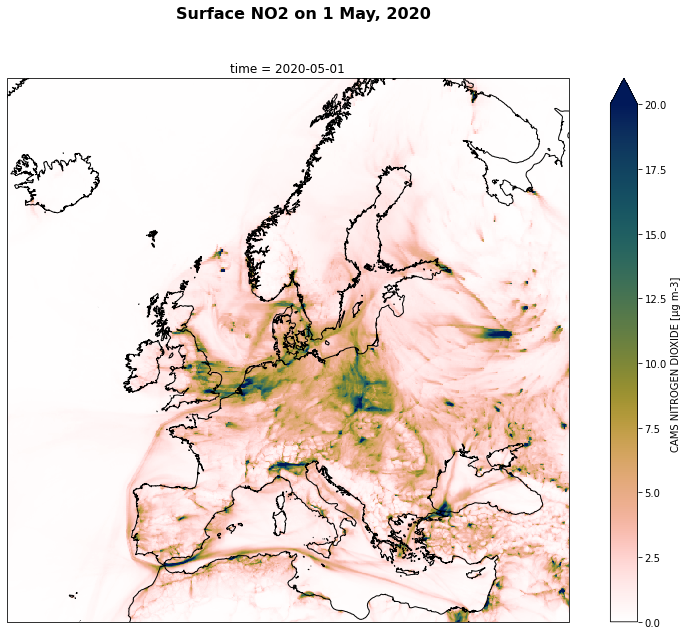

In [57]:
from datetime import datetime
seldate = '2020-05-01'
title = 'Surface NO2 on ' + datetime.strptime(seldate, '%Y-%m-%d').strftime("%-d %B, %Y")
lcmap = cmc.batlowW_r
proj_plot = ccrs.Mercator(central_longitude=12.0)
varname = 'NO2'
vmin = 0
vmax = 20                
plot_one_date(proj_plot, title, varname, vmin, vmax, geotiff_NO2.sel(time=seldate), lcmap, OUTPUT_DATA_DIR)

#### Read PM2.5

In [58]:
PM25_filename = OUTPUT_DATA_DIR + '/' + "PM2_5_EUROPE_ADAMAPI" + start_date + '_' + end_date + '.nc'

In [63]:
if not (pathlib.Path(PM25_filename).exists()):
    geotiff_PM2_5_2019 = getData(INPUT_DATA_DIR + '/PM2_5_EUROPE_ADAMAPI_2019*/*.tif', 'PM2_5', metadata_PM2_5, grid_out=output_grid)
    geotiff_PM2_5_2020 = getData(INPUT_DATA_DIR + '/PM2_5_EUROPE_ADAMAPI_2020*/*.tif', 'PM2_5', metadata_PM2_5)
    geotiff_PM2_5_2021 = getData(INPUT_DATA_DIR + '/PM2_5_EUROPE_ADAMAPI_2021*/*.tif', 'PM2_5', metadata_PM2_5)
    geotiff_PM2_5 = xr.concat([geotiff_PM2_5_2019, geotiff_PM2_5_2020, geotiff_PM2_5_2021], dim='time')
    geotiff_PM2_5.to_netcdf(PM25_filename)
else:
    geotiff_PM2_5 = xr.open_mfdataset([PM25_filename])

#### Read O3

In [66]:
O3_filename = OUTPUT_DATA_DIR + '/' + "O3_EUROPE_ADAMAPI" + start_date + '_' + end_date + '.nc'

In [68]:
if not (pathlib.Path(O3_filename).exists()):
    geotiff_O3_2019 = getData(INPUT_DATA_DIR + '/O3_EUROPE_ADAMAPI_2019*/*.tif', 'O3', metadata_O3, factor=1.e9, grid_out=output_grid)
    geotiff_O3_2020 = getData(INPUT_DATA_DIR + '/O3_EUROPE_ADAMAPI_2020*/*.tif', 'O3', metadata_O3, factor=1.e9)
    geotiff_O3_2021 = getData(INPUT_DATA_DIR + '/O3_EUROPE_ADAMAPI_2021*/*.tif', 'O3', metadata_O3, factor=1.e9)
    geotiff_O3 = xr.concat([geotiff_O3_2019, geotiff_O3_2020, geotiff_O3_2021], dim='time')
    geotiff_O3.to_netcdf(O3_filename)
else:
    geotiff_O3 = xr.open_mfdataset([O3_filename])

### Data analysis - Compute yearly average and maximum for the selected months.

####  Data analysis for NO2

In [69]:
geotiff_NO2max = geotiff_NO2.groupby('time.year').max('time', keep_attrs=True)
geotiff_NO2max

<xarray.Dataset>
Dimensions:    (year: 3, latitude: 400, longitude: 700)
Coordinates:
  * longitude  (longitude) float64 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95
  * latitude   (latitude) float64 69.95 69.85 69.75 69.65 ... 30.25 30.15 30.05
  * year       (year) int64 2019 2020 2021
Data variables:
    NO2        (year, latitude, longitude) float32 dask.array<chunksize=(1, 400, 700), meta=np.ndarray>
Attributes:
    transform:      [  0.1          0.         -25.00001201   0.          -0....
    crs:            +init=epsg:4326
    res:            [0.1 0.1]
    is_tiled:       0
    nodatavals:     0.0
    scales:         1.0
    offsets:        0.0
    AREA_OR_POINT:  Area
    regrid_method:  conservative

In [70]:
geotiff_NO2avg = geotiff_NO2.groupby('time.year').mean('time', keep_attrs=True)
geotiff_NO2avg

<xarray.Dataset>
Dimensions:    (year: 3, latitude: 400, longitude: 700)
Coordinates:
  * longitude  (longitude) float64 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95
  * latitude   (latitude) float64 69.95 69.85 69.75 69.65 ... 30.25 30.15 30.05
  * year       (year) int64 2019 2020 2021
Data variables:
    NO2        (year, latitude, longitude) float32 dask.array<chunksize=(1, 400, 700), meta=np.ndarray>
Attributes:
    transform:      [  0.1          0.         -25.00001201   0.          -0....
    crs:            +init=epsg:4326
    res:            [0.1 0.1]
    is_tiled:       0
    nodatavals:     0.0
    scales:         1.0
    offsets:        0.0
    AREA_OR_POINT:  Area
    regrid_method:  conservative

####  Data analysis for PM2.5

In [71]:
geotiff_PM2_5max = geotiff_PM2_5.groupby('time.year').max('time', keep_attrs=True)
geotiff_PM2_5max

<xarray.Dataset>
Dimensions:    (year: 3, latitude: 400, longitude: 700)
Coordinates:
  * longitude  (longitude) float64 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95
  * latitude   (latitude) float64 69.95 69.85 69.75 69.65 ... 30.25 30.15 30.05
  * year       (year) int64 2019 2020 2021
Data variables:
    PM2_5      (year, latitude, longitude) float32 dask.array<chunksize=(1, 400, 700), meta=np.ndarray>
Attributes:
    transform:      [  0.1          0.         -25.00001201   0.          -0....
    crs:            +init=epsg:4326
    res:            [0.1 0.1]
    is_tiled:       0
    nodatavals:     0.0
    scales:         1.0
    offsets:        0.0
    AREA_OR_POINT:  Area
    regrid_method:  conservative

In [72]:
geotiff_PM2_5avg = geotiff_PM2_5.groupby('time.year').mean('time', keep_attrs=True)
geotiff_PM2_5avg

<xarray.Dataset>
Dimensions:    (year: 3, latitude: 400, longitude: 700)
Coordinates:
  * longitude  (longitude) float64 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95
  * latitude   (latitude) float64 69.95 69.85 69.75 69.65 ... 30.25 30.15 30.05
  * year       (year) int64 2019 2020 2021
Data variables:
    PM2_5      (year, latitude, longitude) float32 dask.array<chunksize=(1, 400, 700), meta=np.ndarray>
Attributes:
    transform:      [  0.1          0.         -25.00001201   0.          -0....
    crs:            +init=epsg:4326
    res:            [0.1 0.1]
    is_tiled:       0
    nodatavals:     0.0
    scales:         1.0
    offsets:        0.0
    AREA_OR_POINT:  Area
    regrid_method:  conservative

####  Data analysis for O3

In [73]:
geotiff_O3max = geotiff_O3.groupby('time.year').max('time', keep_attrs=True)
geotiff_O3max

<xarray.Dataset>
Dimensions:    (year: 3, latitude: 400, longitude: 700)
Coordinates:
  * longitude  (longitude) float64 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95
  * latitude   (latitude) float64 69.95 69.85 69.75 69.65 ... 30.25 30.15 30.05
  * year       (year) int64 2019 2020 2021
Data variables:
    O3         (year, latitude, longitude) float32 dask.array<chunksize=(1, 400, 700), meta=np.ndarray>
Attributes:
    transform:      [  0.1          0.         -25.00001201   0.          -0....
    crs:            +init=epsg:4326
    res:            [0.1 0.1]
    is_tiled:       0
    nodatavals:     0.0
    scales:         1.0
    offsets:        0.0
    AREA_OR_POINT:  Area
    regrid_method:  conservative

In [74]:
geotiff_O3avg = geotiff_O3.groupby('time.year').mean('time', keep_attrs=True)
geotiff_O3avg

<xarray.Dataset>
Dimensions:    (year: 3, latitude: 400, longitude: 700)
Coordinates:
  * longitude  (longitude) float64 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95
  * latitude   (latitude) float64 69.95 69.85 69.75 69.65 ... 30.25 30.15 30.05
  * year       (year) int64 2019 2020 2021
Data variables:
    O3         (year, latitude, longitude) float32 dask.array<chunksize=(1, 400, 700), meta=np.ndarray>
Attributes:
    transform:      [  0.1          0.         -25.00001201   0.          -0....
    crs:            +init=epsg:4326
    res:            [0.1 0.1]
    is_tiled:       0
    nodatavals:     0.0
    scales:         1.0
    offsets:        0.0
    AREA_OR_POINT:  Area
    regrid_method:  conservative

### Visualize average and Maximum values over March-June for 2019, 2020 and 2021
- We aim at highlighting maritime and terrestrial transport activities before, during and after the first lockdown period in 2020

#### Maximum NO2

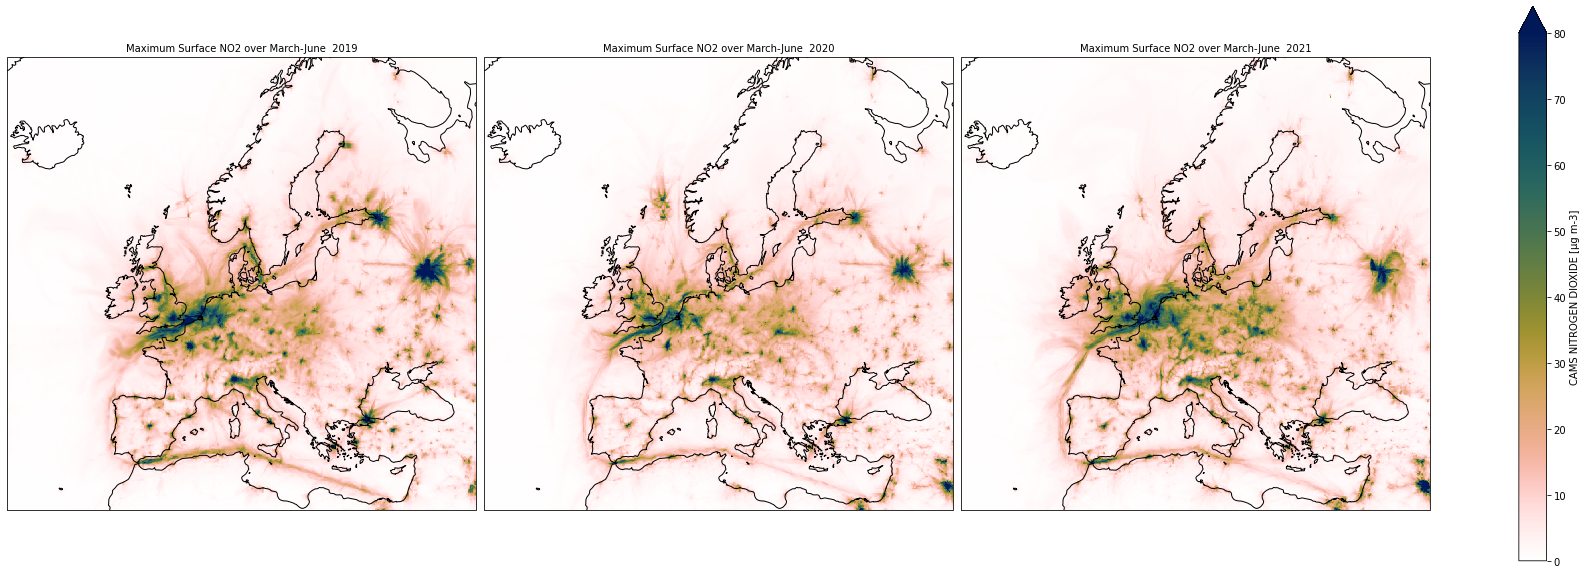

In [75]:
title = 'Maximum Surface NO2 over March-June '
lcmap = cmc.batlowW_r
proj_plot = ccrs.Mercator(central_longitude=12.0)
varname = 'NO2'
vmin = 0
vmax = 80                
plot_multi_years(proj_plot, title, varname, vmin, vmax, geotiff_NO2max, lcmap, OUTPUT_DATA_DIR)

#### Average NO2

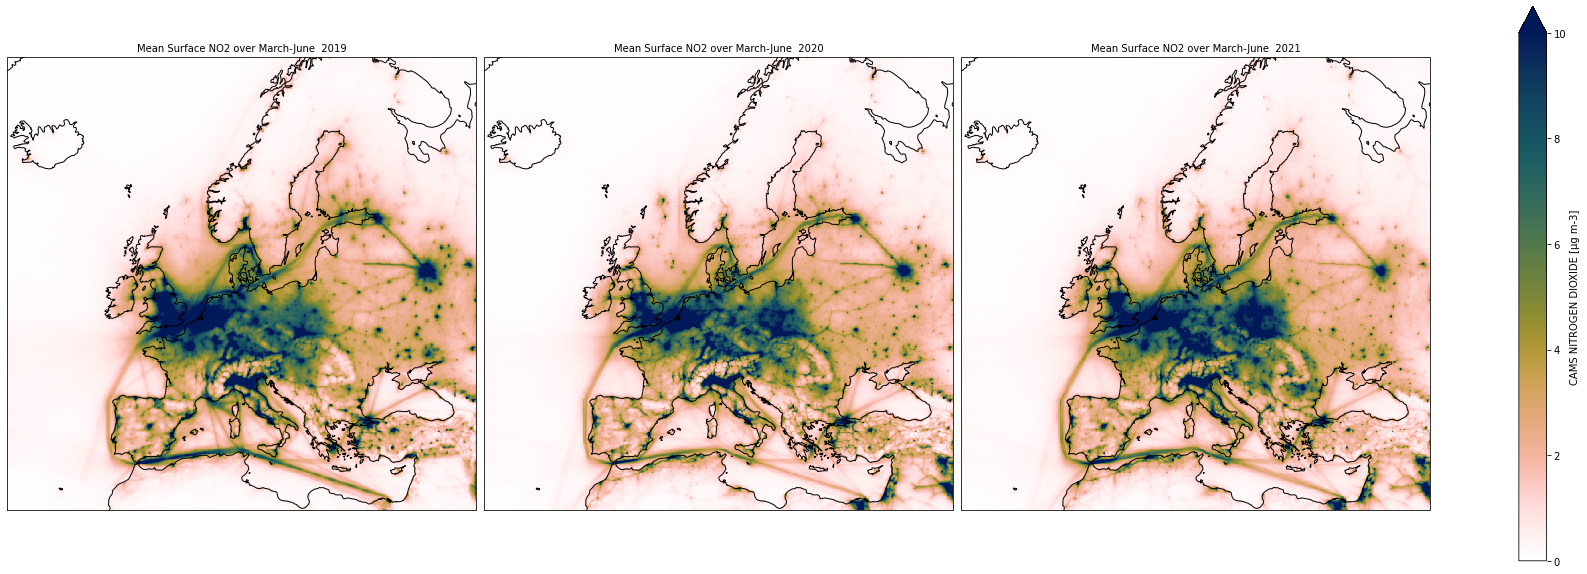

In [76]:
title = 'Mean Surface NO2 over March-June '
lcmap = cmc.batlowW_r
proj_plot = ccrs.Mercator(central_longitude=12.0)
varname = 'NO2'
vmin = 0
vmax = 10                
plot_multi_years(proj_plot, title, varname, vmin, vmax, geotiff_NO2avg, lcmap, OUTPUT_DATA_DIR)

#### Maximum PM2.5

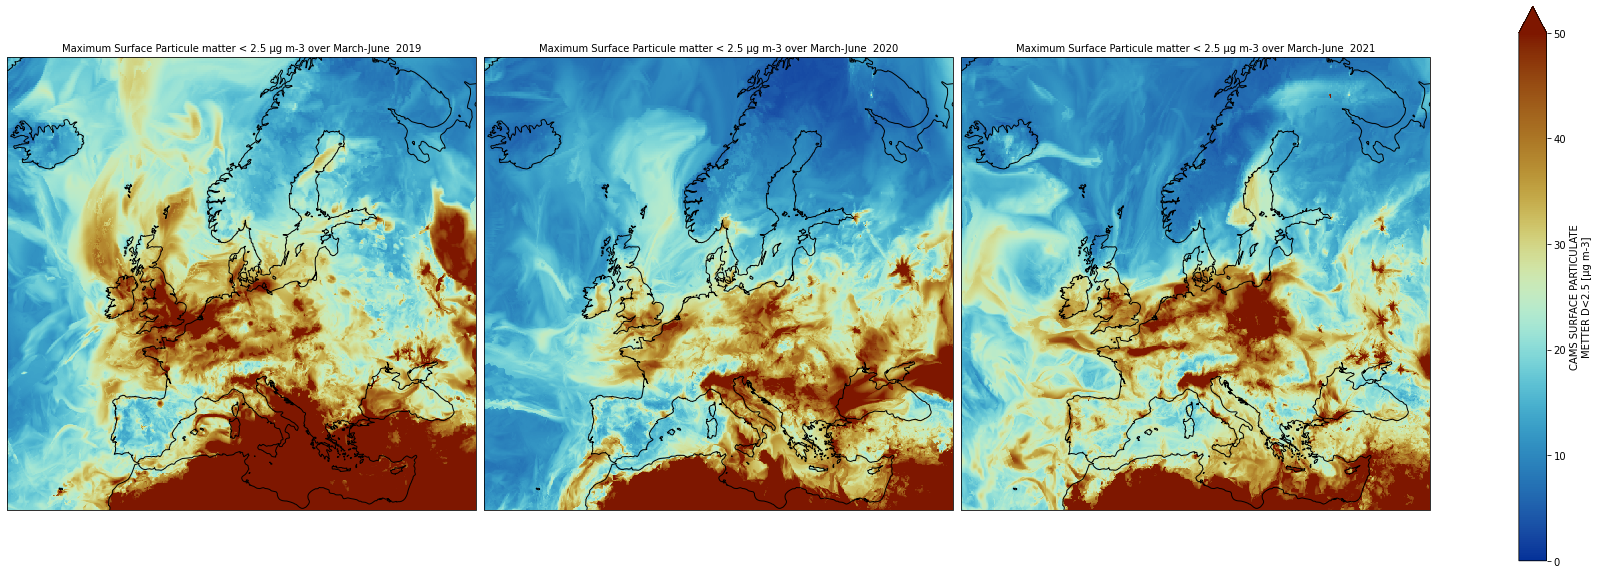

In [77]:
title = 'Maximum Surface Particule matter < 2.5 µg m-3 over March-June '
lcmap = cmc.roma_r
proj_plot = ccrs.Mercator(central_longitude=12.0)
varname = 'PM2_5'
vmin = 0
vmax = 50                
plot_multi_years(proj_plot, title, varname, vmin, vmax, geotiff_PM2_5max, lcmap, OUTPUT_DATA_DIR)

#### Average PM2.5

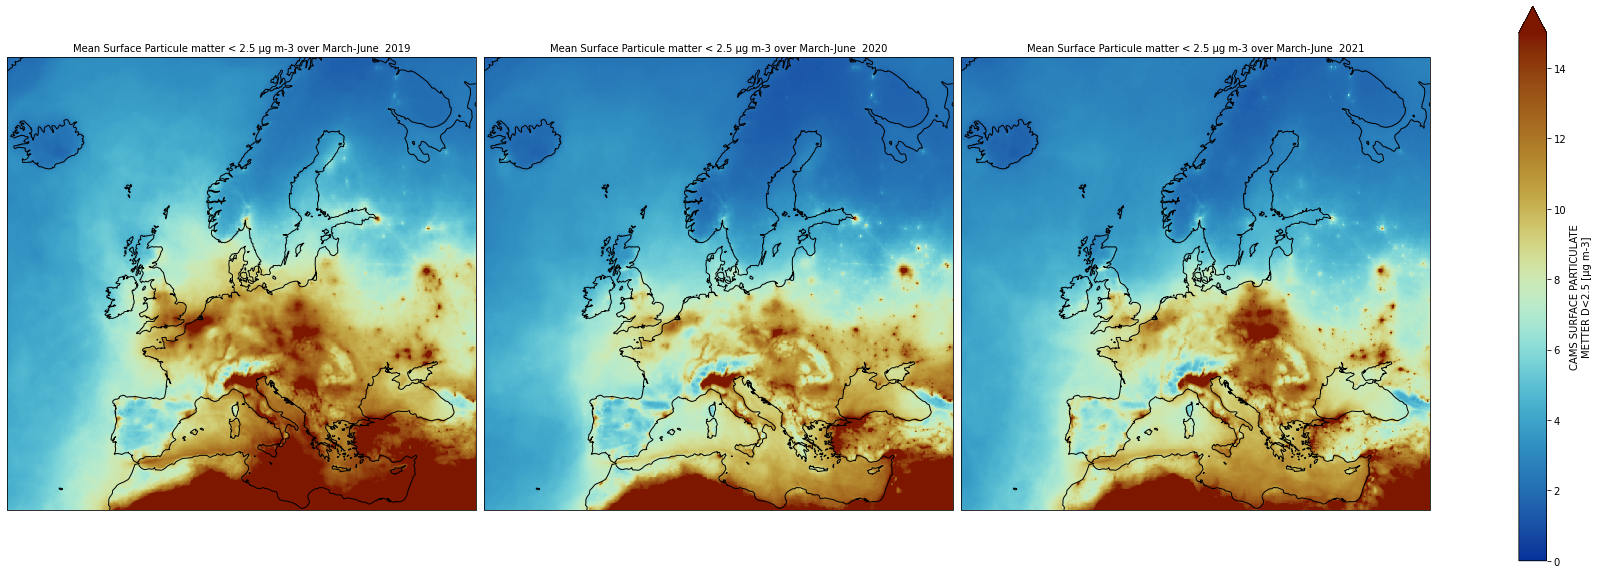

In [78]:
title = 'Mean Surface Particule matter < 2.5 µg m-3 over March-June '
lcmap = cmc.roma_r
proj_plot = ccrs.Mercator(central_longitude=12.0)
varname = 'PM2_5'
vmin = 0
vmax = 15                
plot_multi_years(proj_plot, title, varname, vmin, vmax, geotiff_PM2_5avg, lcmap, OUTPUT_DATA_DIR)

#### Maximum O3

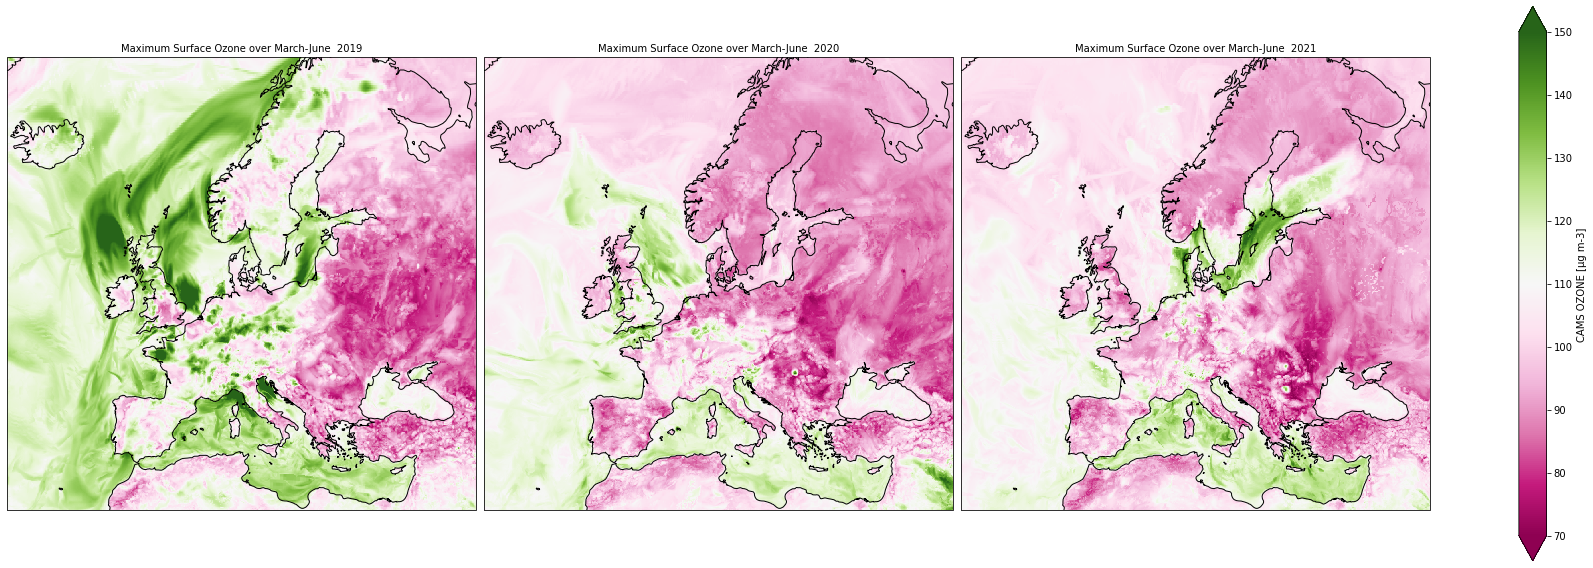

In [79]:
title = 'Maximum Surface Ozone over March-June '
lcmap = 'PiYG'
proj_plot = ccrs.Mercator(central_longitude=12.0)
varname = 'O3'
vmin = 70
vmax = 150                
plot_multi_years(proj_plot, title, varname, vmin, vmax, geotiff_O3max, lcmap, OUTPUT_DATA_DIR)

#### Average O3

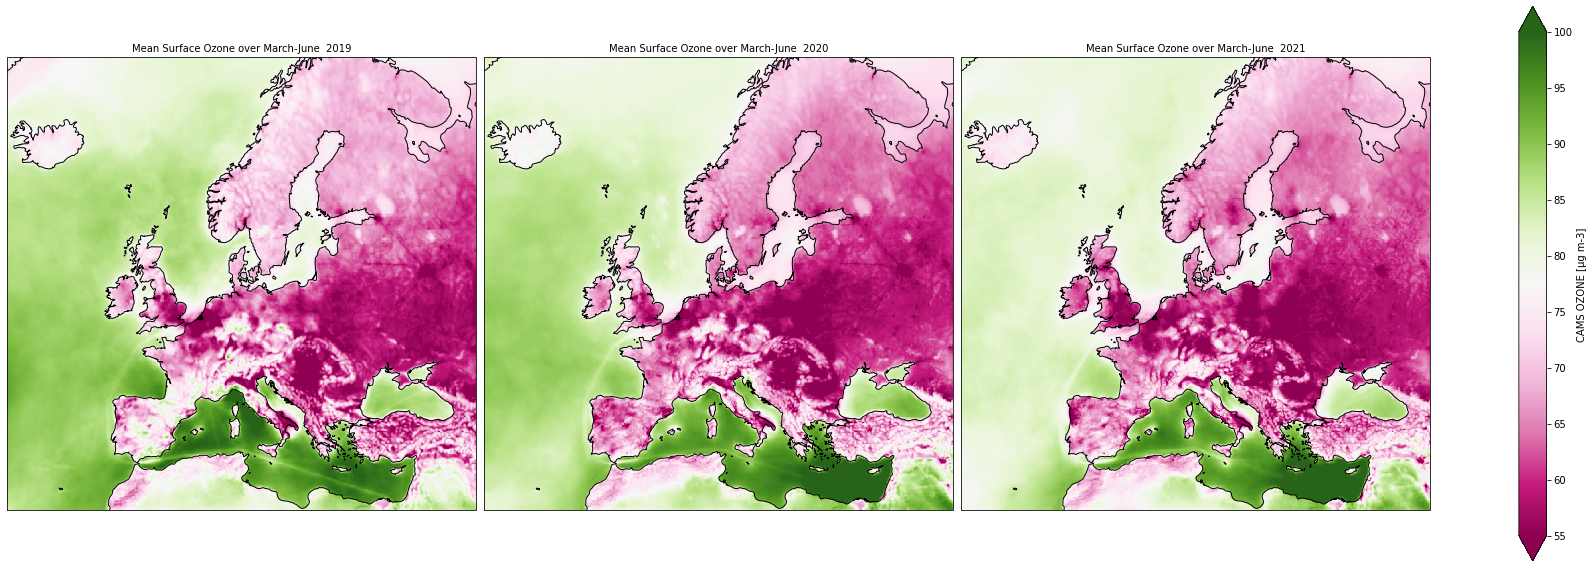

In [80]:
title = 'Mean Surface Ozone over March-June '
lcmap = 'PiYG'
proj_plot = ccrs.Mercator(central_longitude=12.0)
varname = 'O3'
vmin = 55
vmax = 100                
plot_multi_years(proj_plot, title, varname, vmin, vmax, geotiff_O3avg, lcmap, OUTPUT_DATA_DIR)

### Time series of NO2, PM2.5 and O3 at specific locations

In [81]:
Oslo         = {'name': 'Oslo',         'latitude':59.9139, 'longitude':10.7522} 
Stockholm    = {'name': 'Stockholm',    'latitude':59.3293, 'longitude':18.0686} 
Paris        = {'name': 'Paris',        'latitude':48.8566, 'longitude':2.3522} 
Madrid       = {'name': 'Madrid',       'latitude':40.4168, 'longitude':-3.7038} 
London       = {'name': 'London',       'latitude':51.5072, 'longitude':0.1276} 
Milan        = {'name': 'Milan',        'latitude':45.4642, 'longitude':9.1900} 
Moscow       = {'name': 'Moscow',       'latitude':55.7558, 'longitude':37.617} 
Copenhagen   = {'name': 'Copenhagen',   'latitude':55.6761, 'longitude':12.5683} 
Warsaw       = {'name': 'Warsaw',       'latitude':52.2297, 'longitude':21.0122} 
Frankfurt    = {'name': 'Frankfurt',    'latitude':50.1109, 'longitude':8.6821} 
Berlin       = {'name': 'Berlin',       'latitude':52.5200, 'longitude':13.4050} 
NorwegianSea = {'name': 'NorwegianSea', 'latitude':61.0323, 'longitude':1.694} 

In [82]:
locations = [Oslo, Stockholm, Paris, Madrid, London, Milan, Moscow, Copenhagen, Warsaw, Frankfurt, Berlin, NorwegianSea]

#### Visualize selected locations on a map

In [83]:
def plot_locations(proj_plot, title, varnames, vmins, vmaxs, geotiffs, lcmaps, cities, prefix_path):
    fig = plt.figure(1, figsize=[40,10])
    ax = {}
    
    # Create 3 subplots
    for i in range(1,4):
        # here 1 row, 3 columns and i plot
        ax[i] = plt.subplot(1, 3, i, projection=proj_plot)


    for ax,t,dset,vmin, vmax, lcmap in zip([ax[1], ax[2], ax[3]], varnames, geotiffs, vmins, vmaxs, lcmaps):
        map = dset[t].where(dset[t] > 0).plot(ax=ax, x='longitude', y='latitude', transform=ccrs.PlateCarree(),
                                              vmin=vmin, vmax=vmax, cmap=lcmap, add_colorbar=True)
        
        for l in locations:
            ax.scatter(l['longitude'], l['latitude'], color='red', marker='^', s=500, transform=ccrs.PlateCarree())
        ax.set_title(t, fontsize=25)
        ax.coastlines()
        ax.gridlines()

    # Title for all plots
    fig.suptitle('Copernicus air quality forecasts on ' + title, fontsize=30)
    plot_file = prefix_path + '/' + '_'.join(varnames) + title.replace(' ', '_') + '.png'
    if os.path.exists(plot_file + '.bak'):
        os.remove(plot_file + '.bak')
    if os.path.exists(plot_file):
        os.rename(plot_file, plot_file + '.bak')  
    fig.savefig(plot_file)

CPU times: user 6.67 s, sys: 1.48 s, total: 8.15 s
Wall time: 42.7 s


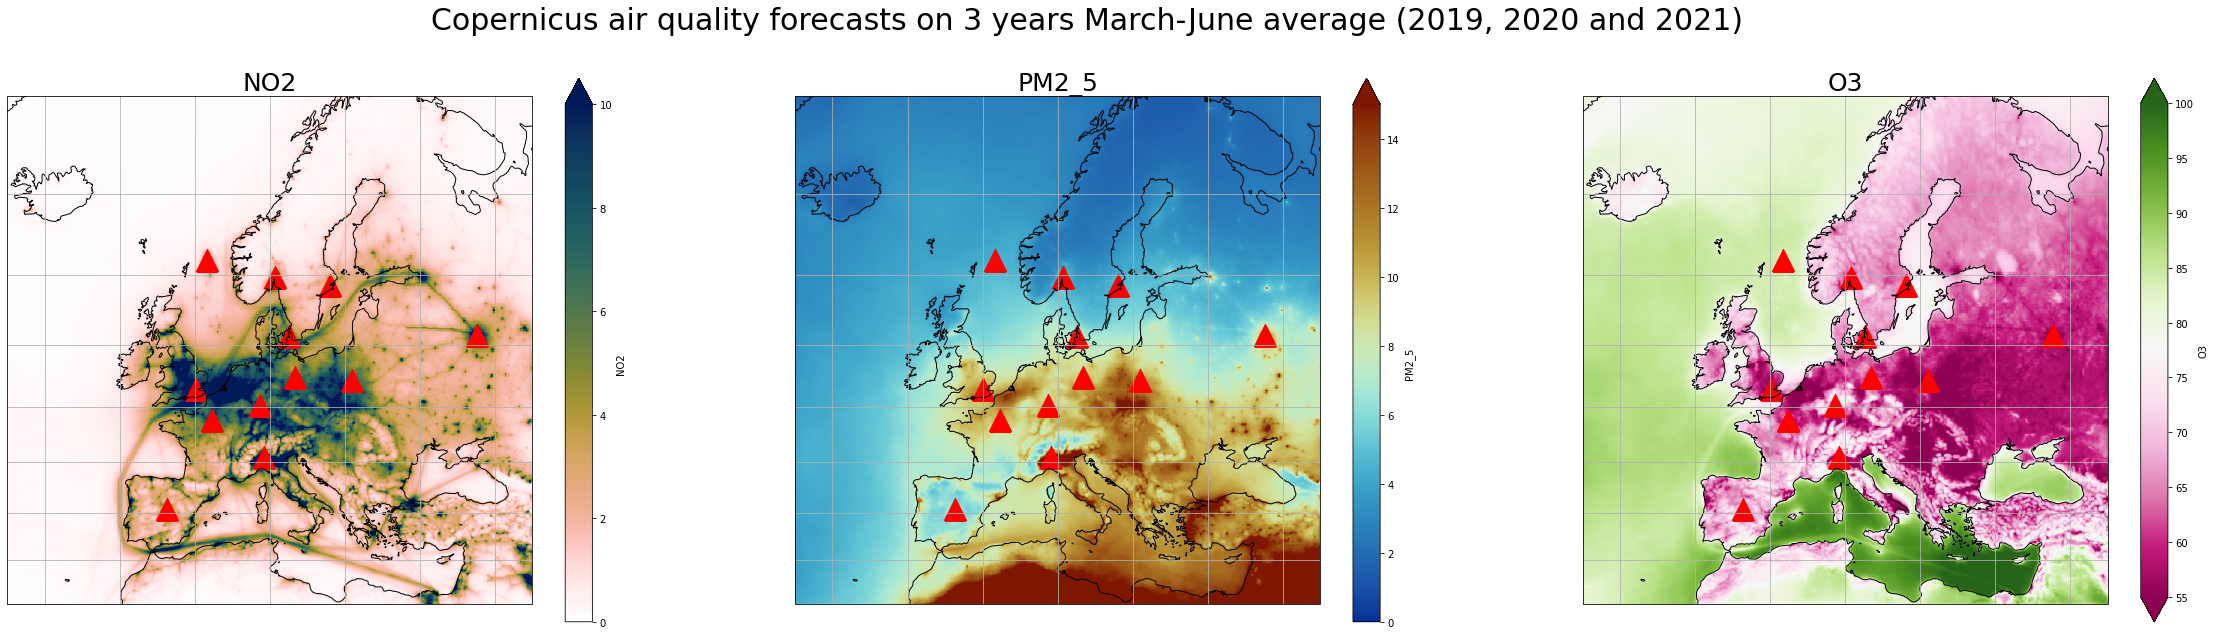

In [84]:
%%time

title = '3 years March-June average (2019, 2020 and 2021)'
varnames = ["NO2", "PM2_5", "O3"]
vmins = [0, 0, 55]
vmaxs =  [10, 15, 100 ]
geotiffs = [geotiff_NO2avg.mean('year'), geotiff_PM2_5avg.mean('year'), geotiff_O3avg.mean('year')]
lcmaps = [cmc.batlowW_r, cmc.roma_r,  'PiYG']

proj_plot = ccrs.Mercator(central_longitude=12.0)
plot_locations(proj_plot, title, varnames, vmins, vmaxs, geotiffs, lcmaps, locations, OUTPUT_DATA_DIR)

### Plot daily averages for all the selected locations

In [85]:
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import pandas as pd
myFmt = mdates.DateFormatter('%d %B')

def plot_timeseries(variable, df, locations, vmin=None, vmax=None, prefix_path="."):
    fig = plt.figure(1, figsize=[20,5*len(locations)])   
    frames = []
    for l,i in zip(locations,range(1,len(locations)+1)):
        ax = plt.subplot(len(locations), 1, i)
        if vmin is not None and vmax is not None:
            plt.ylim(vmin, vmax)
        hd = []
        for year, col in zip([2019, 2020, 2021], ['#66c2a5', '#fc8d62', '#8da0cb']):
            dfyear = df.groupby('time.year')[year].sel(latitude=l['latitude'], longitude=l['longitude'], method='nearest').groupby("time.dayofyear").mean()[variable]
#            dfyear.to_netcdf(variable + '_timeseries_' + l['name'] + '_' + str(year) + '.nc')
            ts = dfyear.plot(ax=ax,c=col, linestyle='--', alpha=0.3)
            dfyear.rolling(dayofyear=7, center=True).mean().plot(ax=ax,c=col, linewidth=4)
            hd.append(mpatches.Patch(color=col, label=str(year)))
            
            dt = dfyear.to_dataframe()
            dt.reset_index(inplace=True)
            dt['year'] = year
            dt['name'] = l['name']
            frames.append(dt)

        plt.legend([ax], handles=hd)
        ax.set_title('Copernicus air quality forecasts ' + variable + ' from March to June in ' + l['name'], fontsize=25)
        ax.set_xlabel("")
        ax.xaxis.set_major_formatter(myFmt)
    plt.tight_layout()
    
    plot_file = prefix_path + '/' + variable + '_rolling_7d' + '.png'
    if os.path.exists(plot_file + '.bak'):
        os.remove(plot_file + '.bak')
    if os.path.exists(plot_file):
        os.rename(plot_file, plot_file + '.bak')  
    fig.savefig(plot_file)
    result = pd.concat(frames)
    result.reset_index(inplace=True)
    result.to_csv(prefix_path + '/' + variable + '_timeseries_' + '.csv', index=False)

In [ ]:
plot_timeseries('NO2', geotiff_NO2, locations, prefix_path=OUTPUT_DATA_DIR)

#### PM2.5

In [ ]:
plot_timeseries('PM2_5', geotiff_PM2_5, locations, prefix_path=OUTPUT_DATA_DIR)

#### O3

In [ ]:
plot_timeseries('O3', geotiff_O3, locations, prefix_path=OUTPUT_DATA_DIR)

### 3 years (2019, 2020 and 2021) March-June average at each selected location

In [ ]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

In [ ]:
def plot_location_stats(variable, df, locations, prefix_path): 
    frames = []
    for l,i in zip(locations,range(1,len(locations)+1)):
        dfyear = df.sel(latitude=l['latitude'], longitude=l['longitude'], method='nearest')
        dt = dfyear.to_dataframe()
        dt.reset_index(inplace=True)
        dt['year'] = pd.DatetimeIndex(dt['time']).year
        dt = dt.groupby("year").mean()
        dt['name'] = l['name']
        frames.append(dt)
    result = pd.concat(frames)
    result.reset_index(inplace=True)
    ax = sns.catplot(x="name", y=variable, hue="year", kind="bar", data=result, height=7, aspect=2.5)
    ax.fig.suptitle('Total ' + variable + ' averaged (March-June) at selected location')
    plot_file = prefix_path + '/' + 'Total ' + variable + 'at_12_differents_locations' + '.png'
    if os.path.exists(plot_file + '.bak'):
        os.remove(plot_file + '.bak')
    if os.path.exists(plot_file):
        os.rename(plot_file, plot_file + '.bak')  
    plt.savefig(plot_file)
    return result

### NO2

In [ ]:
stats_loc = plot_location_stats('NO2', geotiff_NO2, locations, OUTPUT_DATA_DIR)

### PM2.5

In [ ]:
stats_loc = plot_location_stats('PM2_5', geotiff_PM2_5, locations, OUTPUT_DATA_DIR)

### O3

In [ ]:
stats_loc = plot_location_stats('O3', geotiff_O3, locations, OUTPUT_DATA_DIR)

## <a id=9.Discussion></a> Discussion

Maritime routes in the mediteranean areas significantly descreased during the 2020 lockdown, especially from the Suez Canal and along North African coasts. However, these activities are now larger than before covid.

## <a id=10.Conclusion></a> Conclusion

We observed changes for NO2 and for some town PM2.5 but there is no evidence of any sgnificant changes on surface Ozone during the lockdown. A more thorough analysis is required, in particular taking into account meteorological conditions that greatly affect the production of such chemical species. 

## <a id=11.Research_Object></a> Creation of research Object in Rohub

<div class="alert alert-warning alert-info">
    The following lines of code will show you how to authenticate to <b>ROHub</b> using your username and password.
    
</div>

In [1078]:
import rohub

### Authenticate
- you need to create two files in your HOME
    - rohub-user: contains your rohub username
    - rohub-pwd: add your password in this file

In [1080]:
rohub_user = open(os.path.join(os.environ['HOME'],"rohub-user")).read().rstrip()
rohub_pwd = open(os.path.join(os.environ['HOME'],"rohub-pwd")).read().rstrip()
rohub.login(username=rohub_user, password=rohub_pwd)

Logged successfully as annefou@geo.uio.no.


### Creation of a new executable Research Object

In [ ]:
ro_title="Impact of the Covid-19 Lockdown on Air quality over Europe using Copernicus Atmosphere Monitoring Service"
ro_research_areas=["Earth sciences"]
ro_description="""This notebook shows how to discover and access the [Copernicus Atmosphere Monitoring](https://ads.atmosphere.copernicus.eu/#!/home) products available 
in the **RELIANCE** datacube resources, by using the functionalities provided in the <font color='blue'> **Adam API** </font>. 

The COVID-19 pandemic has led to significant reductions in economic activity, especially during lockdowns. Several studies has shown that the concentration of nitrogen 
dioxyde and particulate matter levels have reduced during lockdown events. Reductions in transportation sector emissions are most likely largely responsible for the NO2 
anomalies. In this study, we analyze the impact of lockdown events on the air quality using data from [Copernicus Atmosphere Monitoring Service](https://ads.atmosphere.copernicus.eu/).
"""
ro_ros_type="Executable Research Object"
ro_ros_template="Executable Research Object folders structure"

ro = rohub.ros_create(title=ro_title, research_areas=ro_research_areas, 
                      description=ro_description, 
                      use_template=True,
                      ros_type=ro_ros_type)